# NBA Player Shot Selections

Previously I've exmained Kobe Byrant's shooting selection over his basketball career. I've shown that as the years went by, Kobe has increasingly preferred the long distance shot rather than the lay-up, as his amazing athleticism and speed slowly degrade.

I was wondering whether this trend of moving more towards the 3-points line came from the fact that Kobe got older and older, or simply because the game changed, pushing more players to throw from outside the arc (of course these scenarios are not mutually exclusive).

So do older players shoot from further away when the time variable is "frozen" (or controlled) and we only look ast one season? 

It is worthwhile to mention that my analysis only takes into account guards. a. because Jobe was a guard. B. because forwards and centers barely throw from the 3 points line to begin with, which might make the analysis not as meaningful and more prone to noise. 

*The following analysis uses data from the 2015-2016 NBA season*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from IPython.display import Image
plt.style.use('fivethirtyeight')


In [2]:
players = pd.read_csv('players_stats.csv')
shots = pd.read_csv('shot_logs.csv')

In [3]:
players['Name'] = players.Name.apply(lambda x: x.strip(',.').lower())
players['Average_Dist'] = players.Name.apply(lambda x: np.mean(shots.SHOT_DIST[shots.player_name == x]))


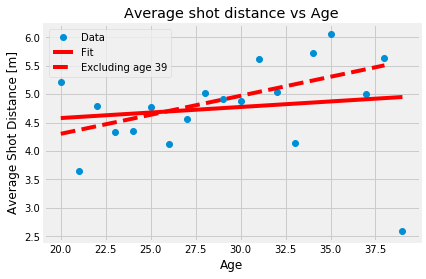

In [4]:
age_df = pd.DataFrame()
age_df['Age'] = np.unique(players.Age)
age_df['Dist'] = age_df.Age.apply(lambda x: 0.304*np.mean(players.Average_Dist[(players.Age == x) & ((players.Pos == 'SG') | (players.Pos == 'PG'))]))

age_df = age_df[~(age_df.Age == 36)]
plt.plot(age_df.Age,age_df.Dist,'o')
x = age_df['Age'][0:19]
y = age_df['Dist'][0:19]

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot(x,fit_fn(x),'r')

age_df = age_df[~(age_df.Age == 36)]
x = age_df['Age'][0:18]
y = age_df['Dist'][0:18]

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot(x,fit_fn(x),'r--')


plt.legend(['Data','Fit','Excluding age 39'])

plt.title('Average shot distance vs Age')
plt.xlabel('Age')
plt.ylabel('Average Shot Distance [m]')
plt.show()

Similarly to Kobe's trend. with age, the average shot distance increases

Text(0.5, 1.0, 'The share of 3 pointers goes up with age')

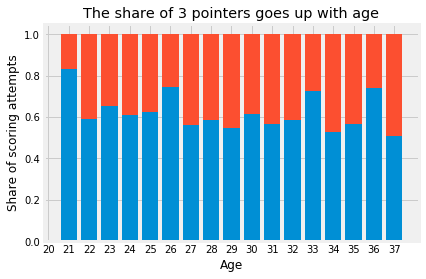

In [5]:
players['2PA'] = players.FGA - players['3PA']
age_df['2PA'] = age_df.Age.apply(lambda x: np.sum(players['2PA'][players.Age == x]))
age_df['3PA'] = age_df.Age.apply(lambda x: np.sum(players['3PA'][players.Age == x]))

age_df['3P ratio'] = age_df['3PA']/(age_df['2PA'] + age_df['3PA'])
age_df['2P ratio'] = 1 - age_df['3P ratio']

age_df['2PA_guard'] = age_df.Age.apply(lambda x: np.sum(players['2PA'][(players.Age == x) & ((players.Pos == 'PS') | (players.Pos.values == 'SG'))]))
age_df['3PA_guard'] = age_df.Age.apply(lambda x: np.sum(players['3PA'][(players.Age == x) & ((players.Pos == 'PS') | (players.Pos.values == 'SG'))]))
age_df['3P ratio g'] = age_df['3PA_guard']/(age_df['2PA_guard'] + age_df['3PA_guard'])
age_df['2P ratio g'] = 1 - age_df['3P ratio g']

plt.bar(range(len(age_df['3P ratio g'])),age_df['2P ratio g'])
plt.bar(range(len(age_df['3P ratio g'])),age_df['3P ratio g'],bottom = age_df['2P ratio g'])
plt.xticks(range(18),np.arange(20,38,1))
plt.xlabel('Age')
plt.ylabel('Share of scoring attempts')
plt.title('The share of 3 pointers goes up with age')

The older the player are, the bigger is the share of 3 pointers they shoot

In [ ]:
sns.distplot(shots.SHOT_DIST[(shots.Player_Age == 21) & ((shots.Pos == 'PS') | (shots.Pos.values == 'SG'))], bins = np.arange(1,30,1))
sns.distplot(shots.SHOT_DIST[(shots.Player_Age == 37) & ((shots.Pos == 'PS') | (shots.Pos.values == 'SG'))], bins = np.arange(1,30,1))

plt.legend(['Age 21','Age 37'])
plt.title('Guards shooting distance distribution')
plt.show()

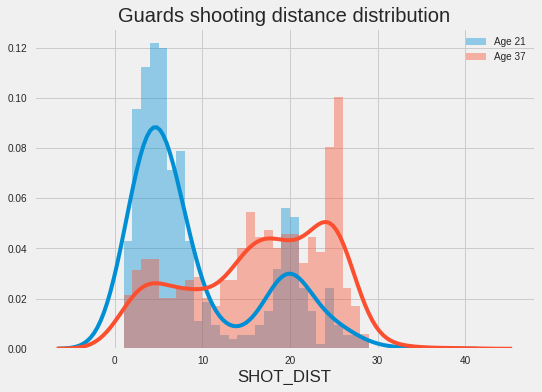

In [7]:
Image(filename='shooting_distance.png', width=500, height =500)

The most common shot for a young player is near-the-basket, whereas the most common shot for a 37 year old player is a 3-pointer. This is almost an identical pattern as with the comparison of young Kobe vs old Kobe.